# **2. EXPLORATORY DATA ANALYSIS**

In [ ]:
# ! pip install missingno lazypredict scikit-optimize

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# ! pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# ! pip install axis

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# ! pip install utils.py

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


<pan style="color:orange">NOTE: Within the "utils.py" folder there are specific functions to develop EDA (Exploratory Data Analysis) and DDA (Descriptive Data Analysis).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda
from sklearn.model_selection import train_test_split

cleaned_data = pd.read_csv("cleaned_data.csv")
target_variable = "price"

In [7]:
cleaned_data.shape

(14445, 7)

### 0. Choose a variable target:

It has to be the best and more interesting of data set. It can give us important answers.

<pan style="color:pink">We use "price" becasuse is the most relevant column of the data set.

# STEP 1: MULTIVARIABLE ANALYSIS

### 1. Analysis between the variable target and the rest of the variables:

- Values close to 0: No relationship
- High positive values: Strong direct relationship
- High negative values: Strong inverse relationship

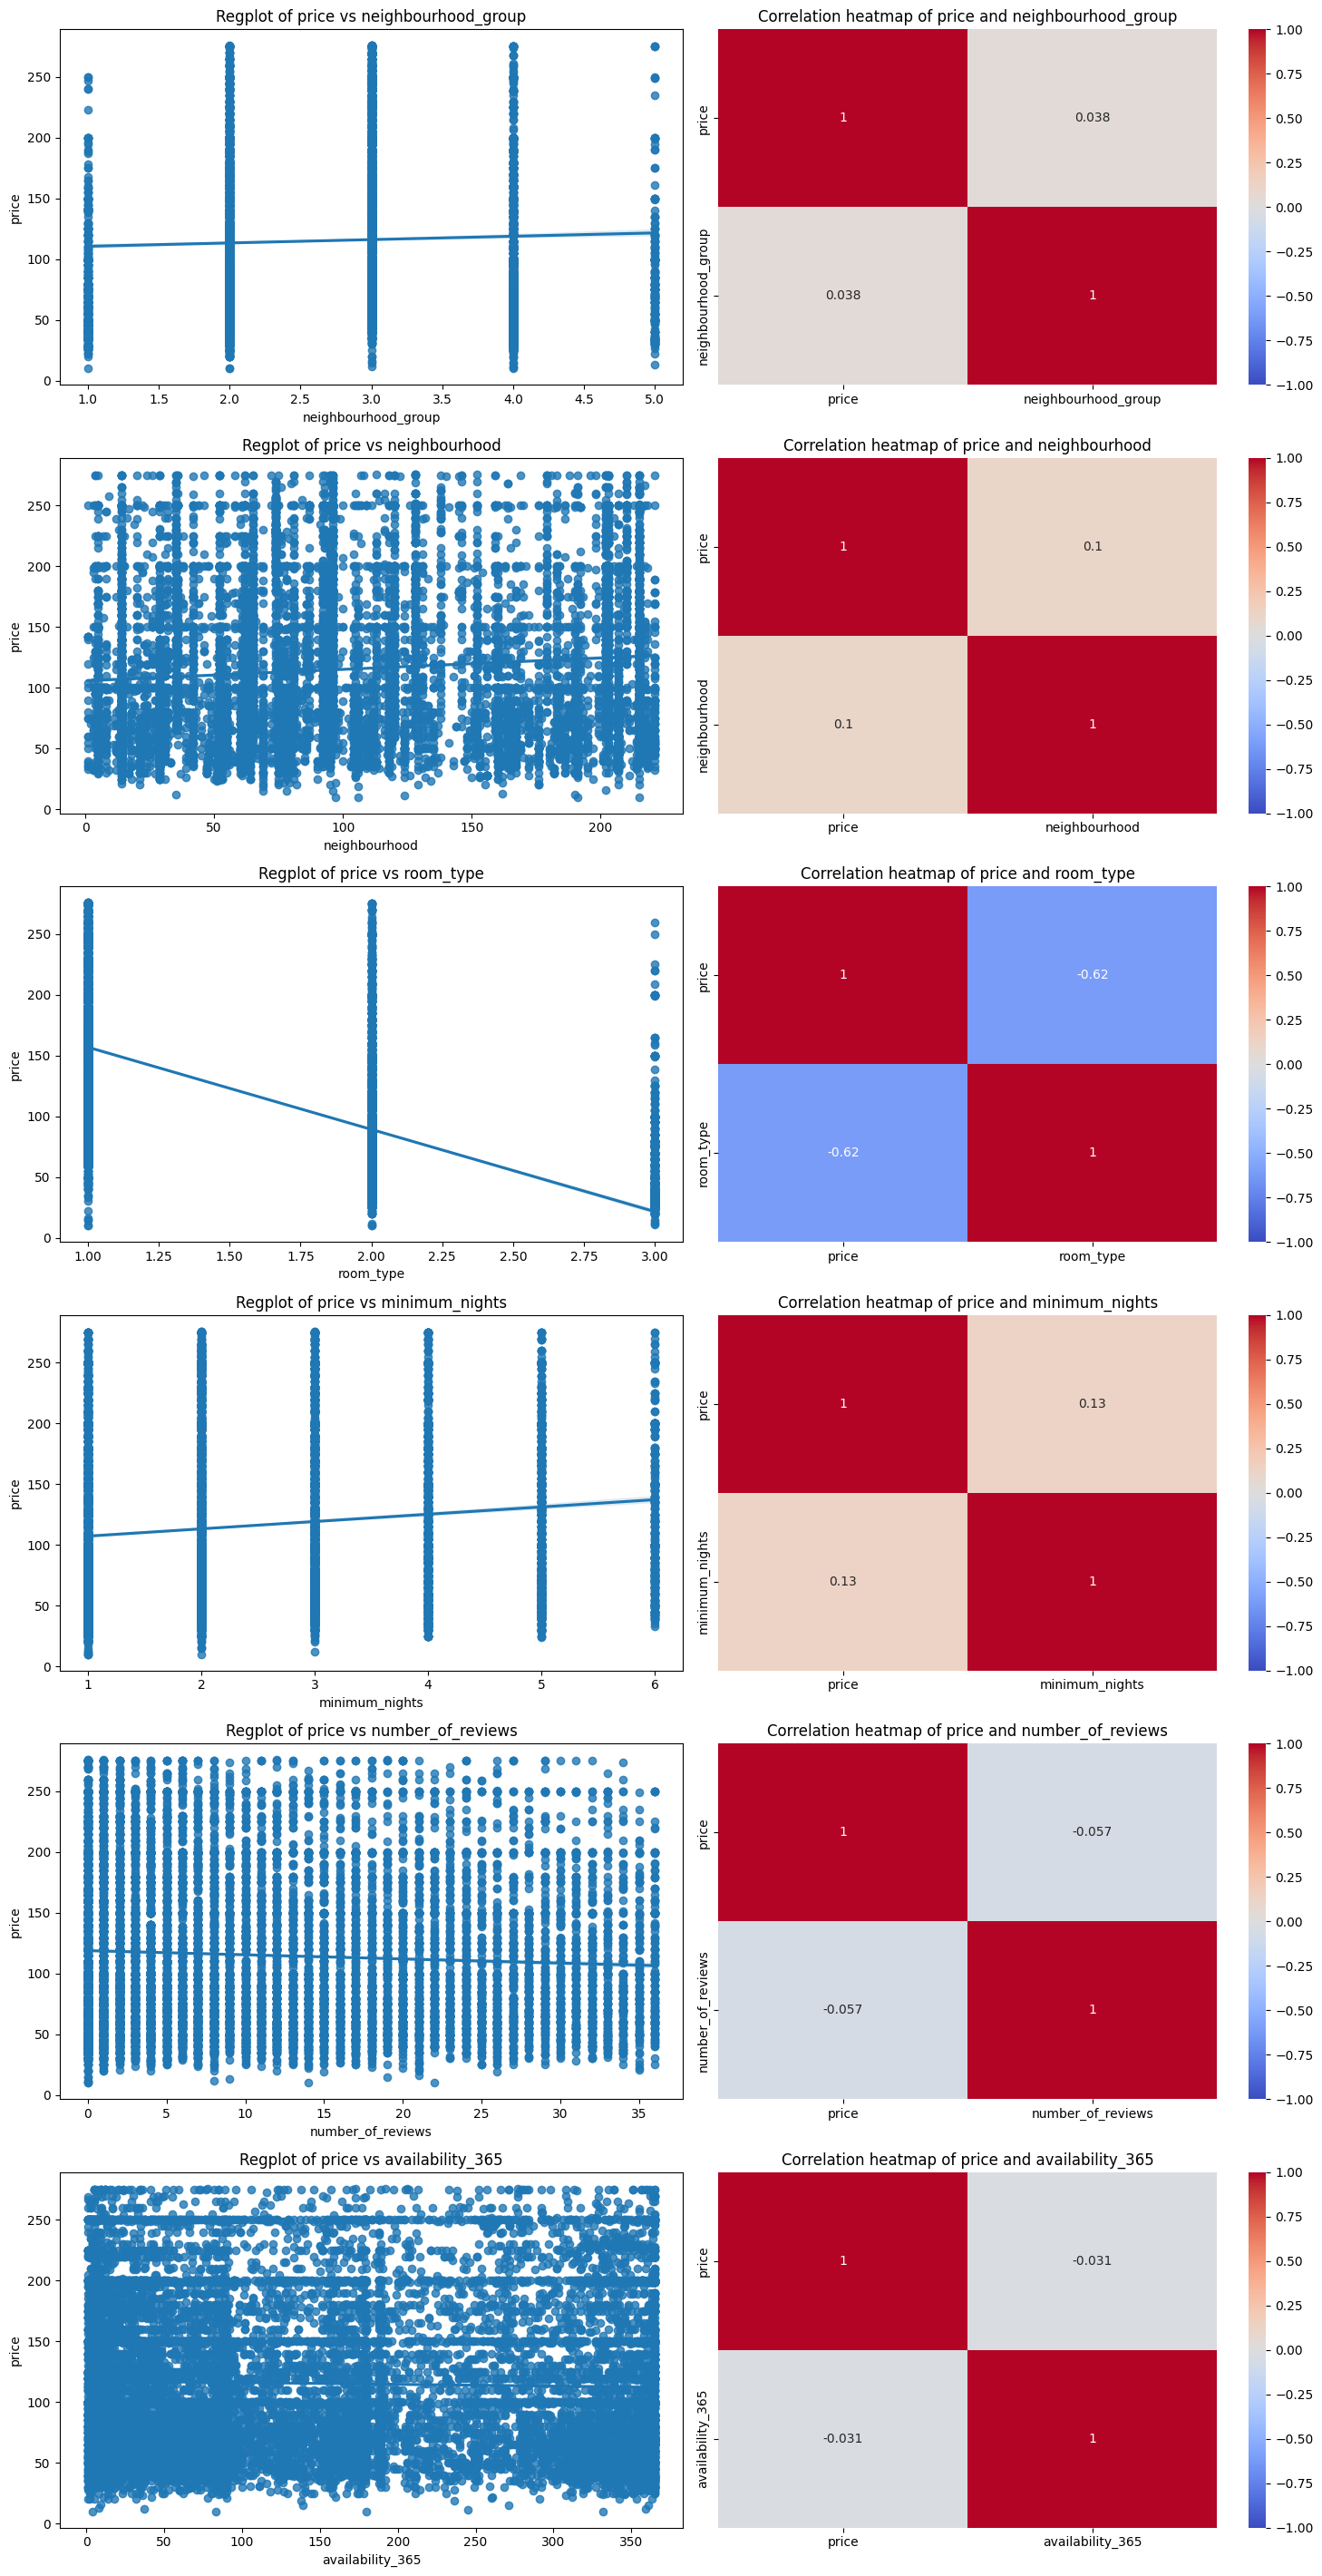

In [7]:
eda.plot_regplot_heatmap(cleaned_data, target_variable)

### 2. General dataset scatter plot:

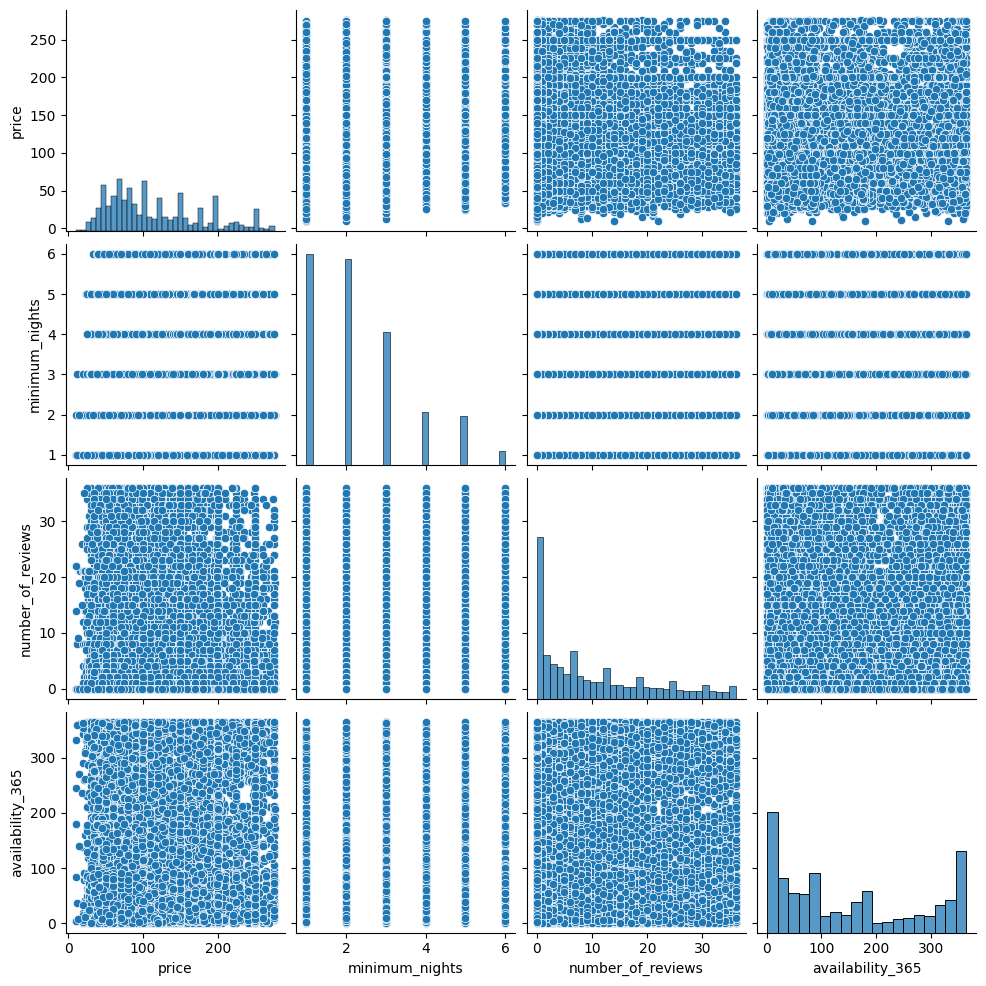

In [9]:
# Pairplot for selected numerical features including the target
sns.pairplot(cleaned_data, vars=["price", "minimum_nights", "number_of_reviews", "availability_365"])
plt.show()

### 3. General correlation heatmap:

        +1 -> Perfect positive correlation

        0  -> No relationship

        -1 -> Perfect negative correlation

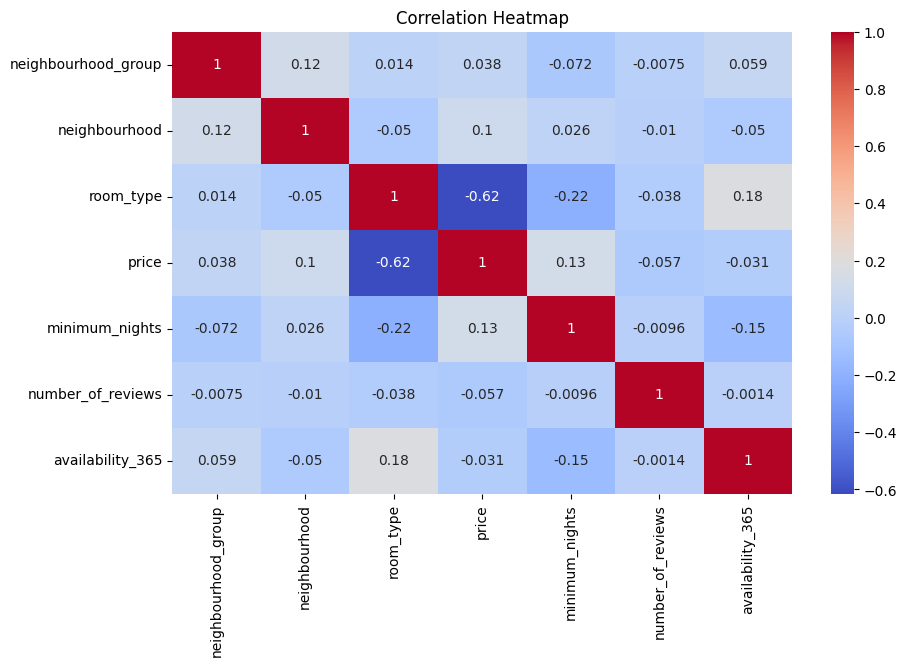

In [7]:
eda.plot_correlation_heatmap(cleaned_data, target_variable)

### 4. VIF (Variance Inflation Factor)

In [3]:
eda.calculate_vif(cleaned_data)

,feature,VIF
0,neighbourhood_group,9.50
2,room_type,6.99
3,price,4.52
4,minimum_nights,3.82
1,neighbourhood,3.27
6,availability_365,2.60
5,number_of_reviews,1.94


# CONCLUSIONS OF EDA ANALYSIS:

### 1. Analysis between the variable target and the rest of the variables:
- REGPLOTS
  - Neighbourhood Group: Scattered dots, there aren't clear pattern -> Weak realtionship
  - Neighbourhood: Lots of noise, there aren't visible trend -> Low relationship
  - Room Type: Some separation by type -> Moderate relationship
  - Minimum Nights: Many outliers (extreme values) -> Weak and biased relationship
  - Number of Reviews: Shapeless point cloud -> Without clear relationship
  - Availability 365: Slight trend, but very scattered -> Very weak relationship

- HEATMAPS

  Most of the values are close to 0, which confirms that no variables has a strong correlation with price. The partial exception might be room_type, which shows a bit more structure.

### 2. General dataset scatter plot:

- Price: High skewed, with many low values and few very high values
- Minimum nights: Also skewed, with many low values
- Reviews: Concentrated in low values
- Availability: Uniform distribution

Relationship between variables:

- Precio vs Minimum nights: Very low correlation
- Price vs Reviews: Low correlation
- Price vs Availabily: Low correlation
- Reviews vs Availability: Low correlation

### 3. General correlation heatmap:

- Most correlations are close to 0
- Their are not good variables to do predictions
- Only room type has a slightly correlation

### 4. VIF (Variance Inflation Factor)

- High multycollinearity: Neighbourhood Group and Room Type. Remove Neighbourhood Group to reduce redundancy.
- Moderate multycollinearity: Price, Minimum nights, Neighbourhood. We can remove Minimum nights to improve interpretation
- Low multycollinearity: Availability 365 and Number of Reviews. Can be good predictors without generating statistical noise. However, it's advisable to conduct your own qualitative research.

### FINAL CONCLUSIONS OF EDA:

<pan style="color:yellow">- Room type is the most promising variable. The others have low direct predictive utility. But using "price" variable we can make future price predictions based on room type.

<pan style="color:yellow">- Also we will use Room Type, Neighbourhood.

### RECOMENDATIONS:

Always do VIF (Variance Inflation Factor) to show the multycollinearity variables level

- High multycollinearity -> Remove some varible to reduce redundance
- Moderate multycollinearity -> Transform or segment varibles to improve interpretation
- Low multycollinearity -> Keep this variables, they can be good predictors